# **K-Means Text Clustering**
Processo de separar ou agregar partes de dados em pontos comuns, separar por diferença juntar por semelhança, é um importante algoritmo não supervisionado, é muito util na parte de EDA. A escolha do melhor algoritmo depende do que estamos tratando.
Baseado na ideia de centroide, vai definir K clusters que vai ser um ponto central que vai agregar outros pontos ao seu arredor. Pontos que estão mais pertos de um certo centroide vão fazer parte dele. Verificando a distância para todos os centroides.

### **Imports**

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import time
import sklearn.cluster as cluster

sns.set_context('poster')
sns.set_color_codes()

%matplotlib inline
plot_kwds = {'alpha': 0.25, 's': 80, 'linewidths': 0}

### **Get Data and Plot**

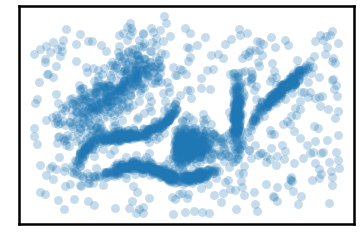

In [2]:
df = np.load('./datasets/clusterable_data.npy')
plt.scatter(df.T[0], df.T[1], **plot_kwds)
frame = plt.gca()
frame.axes.get_xaxis().set_visible(False)
frame.axes.get_yaxis().set_visible(False)

In [4]:
df.shape

(2309, 2)

### **Functions**

In [7]:
def plot_clusters(data, algorithm, args, kwds):
    start_time = time.time()
    labels = algorithm(*args, **kwds).fit_predict(data)
    end_time = time.time()
    palette = sns.color_palette('deep', np.unique(labels).max() + 1)
    colors = [palette[x] if x >= 0 else (0.0, 0.0, 0.0) for x in labels]
    plt.scatter(data.T[0], data.T[1], c=colors, **plot_kwds)
    frame = plt.gca()
    frame.axes.get_xaxis().set_visible(False)
    frame.axes.get_yaxis().set_visible(False)
    plt.title(f'Clusters by {str(algorithm.__name__)}', fontsize=10)
    plt.text(-0.5, 0.6, 'Running Time {:.2f} s'.format(end_time - start_time), fontsize=14)

### **K-Means**

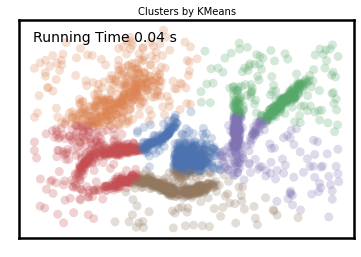

In [8]:
plot_clusters(df, cluster.KMeans, (), {'n_clusters': 6})